In [7]:
# Task Sets
#Which set of moves will get the best ratio of attack power to SP spent?
#Which team of 3 digimon have the highest attack? Defense?
#What’s the tradeoff between HP and SP?
#Are some types over- or under-represented?
#Both the moves and support skills have short text descriptions. Can an NLP analysis reveal underlying clusters of moves?
#Are different types and attributes evenly represented across stages?

In [ ]:
#Which set of moves will get the best ratio of attack power to SP spent?

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

digimon=pd.read_csv(r'C:\Users\shari\Desktop\Desktop\Data Analysis\Portfolio Projects\Digimon Database/DigiDB_digimonlist.csv')
movelist=pd.read_csv(r'C:\Users\shari\Desktop\Desktop\Data Analysis\Portfolio Projects\Digimon Database/DigiDB_movelist.csv')
supptlist = pd.read_csv(r'C:\Users\shari\Desktop\Desktop\Data Analysis\Portfolio Projects\Digimon Database/DigiDB_supportlist.csv')

In [15]:
movelist['Best ratio']=round(movelist['Power']/movelist['SP Cost'],1)
movelist.sort_values('Best ratio',ascending=False).head(3)

,Move,SP Cost,Type,Power,Attribute,Inheritable,Description,Best ratio
80,Heavy Strike I,3,Physical,70,Neutral,Yes,"Physical attack, 70 Neutral damage to one foe....",23.3
0,Wolkenapalm I,3,Physical,65,Fire,Yes,"Physical attack, 65 Fire damage to one foe. 95...",21.7
30,Nanomachine Break I,3,Physical,65,Thunder,Yes,"Physical attack, 65 Thunder damage to one foe....",21.7


In [17]:
#Which team of 3 digimon have the highest attack? Defense?

In [19]:
digimon.sort_values('Lv50 Atk',ascending=False).head(3)

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
243,244,Chaosmon,Ultra,Vaccine,Neutral,25,2,1080,129,318,94,89,188
235,236,Belphemon RM,Ultra,Virus,Dark,25,0,1780,84,247,168,109,140
195,196,Diaboromon,Mega,Free,Dark,20,2,1680,114,243,104,79,173


In [21]:
digimon.sort_values('Lv50 Def',ascending=False).head(3)

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
181,182,GroundLocomon,Mega,Data,Electric,18,3,1140,114,144,213,133,128
182,183,Craniamon,Mega,Vaccine,Earth,22,1,1630,143,124,208,134,124
238,239,Magnamon,Armor,Free,Earth,22,2,1240,124,168,208,148,124


In [23]:
#Are some Attribute over- and under- represented?

In [25]:
def Check(msg,ind):
    mean=digimon[msg].mean()
    i = digimon[msg][ind]
    if i<mean:    
        return 'Weak'
    elif i>mean:
        return 'Strong'
    else:
        return 'Mean'    
lv50=['Lv 50 HP','Lv50 SP','Lv50 Atk','Lv50 Def','Lv50 Int','Lv50 Spd']
lv={}
for i in lv50:
    lv[i]=[]
    for j in range(249):
        t=Check(i,j)
        lv[i].append(t)
temp_digi=pd.DataFrame(lv)
temp_digi['Attribute']=digimon['Attribute'].copy()
stats_dig={'Attribute':[]}
for i in temp_digi['Attribute'].unique():
    stats_dig['Attribute'].append(i)
temp_dic={}
for i in lv50:
    temp_dic[i]=[0,0]
    stats_dig[i]=[]
    for k in stats_dig['Attribute']:
        for j,l in zip(temp_digi['Attribute'],temp_digi[i]):
            if k!=j:
                continue
            if l=='Weak':
                temp_dic[i][0]=temp_dic[i][0]+1
            else:
                temp_dic[i][1]=temp_dic[i][1]+1
        if temp_dic[i][0]/1.2<temp_dic[i][1]:
            stats_dig[i].append('Great')
        if temp_dic[i][0]/1.2>temp_dic[i][1]:
            stats_dig[i].append('Weak')
        if temp_dic[i][0]/1.2==temp_dic[i][1]:
            stats_dig[i].append('MID')
df_stats=pd.DataFrame(stats_dig)
df_stats    

,Attribute,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
0,Neutral,Weak,Weak,Great,Weak,Weak,Weak
1,Fire,Great,Weak,Great,Weak,Weak,Weak
2,Plant,Great,Weak,Great,Weak,Weak,Weak
3,Earth,Great,Weak,Great,Weak,Weak,Weak
4,Dark,Great,Weak,Great,Weak,Weak,Weak
5,Light,Great,Great,Weak,Weak,Weak,Great
6,Water,Great,Great,Weak,Weak,Great,Great
7,Wind,Great,Great,Weak,Weak,Weak,Great
8,Electric,Great,Weak,Weak,Weak,Weak,Great


In [27]:
#Are different Types and Attribute evenly represented across Stages ?

C:\Users\shari\AppData\Local\Temp\ipykernel_80536\1219785118.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp_list[ind][j]=temp[i]


<Axes: >

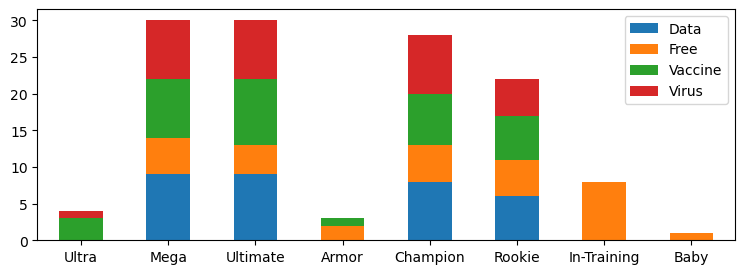

In [29]:
tatype=pd.DataFrame()
tatype['Attribute']=digimon['Attribute'].copy()
tatype['Type']=digimon['Type'].copy()
tatype['Stage']=digimon['Stage'].copy()
tatype.drop_duplicates(inplace=True,ignore_index=True)

xsubject=['Ultra','Mega','Ultimate','Armor','Champion','Rookie','In-Training','Baby']

temp=tatype.groupby('Type').Stage.value_counts()
temp_list=[]
for i in range(tatype['Type'].nunique()):
    temp_list.append([])
    for j in range(len(xsubject)):
        temp_list[i].append(0)
        
def asi(xstr,i,ind):
    for j in range(len(xstr)):
            if xstr[j]==temp.index[i][1]:
                temp_list[ind][j]=temp[i]
        
for i in range(len(temp)):
    if temp.index[i][0]=='Data':
        asi(xsubject,i,0)

    if temp.index[i][0]=='Free':
        asi(xsubject,i,1)

    if temp.index[i][0]=='Vaccine':
        asi(xsubject,i,2)

    if temp.index[i][0]=='Virus':
        asi(xsubject,i,3)

        
plo_df=pd.DataFrame({'Data':temp_list[0],'Free':temp_list[1],'Vaccine':temp_list[2],'Virus':temp_list[3]},index=xsubject)
plo_df.plot.bar(rot=0,stacked=True,figsize=(9,3))

C:\Users\shari\AppData\Local\Temp\ipykernel_80536\1219785118.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp_list[ind][j]=temp[i]


<Axes: >

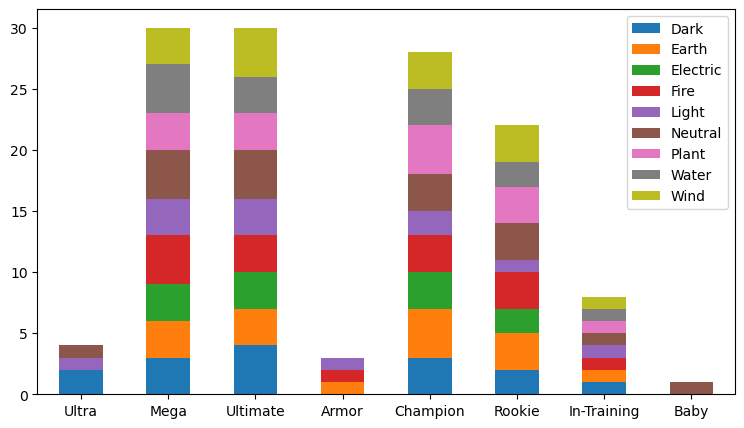

In [31]:
temp_list=[]
temp=tatype.groupby('Attribute').Stage.value_counts()

for i in range(tatype['Attribute'].nunique()):
    temp_list.append([])
    for j in range(len(xsubject)):
        temp_list[i].append(0)

        
for i in range(len(temp)):
    if temp.index[i][0]=='Dark':
        asi(xsubject,i,0)

    if temp.index[i][0]=='Earth':
        asi(xsubject,i,1)

    if temp.index[i][0]=='Electric':
        asi(xsubject,i,2)

    if temp.index[i][0]=='Fire':
        asi(xsubject,i,3)
    
    if temp.index[i][0]=='Light':
        asi(xsubject,i,4)
    
    if temp.index[i][0]=='Neutral':
        asi(xsubject,i,5)
        
    if temp.index[i][0]=='Plant':
        asi(xsubject,i,6)
    
    if temp.index[i][0]=='Water':
        asi(xsubject,i,7)
    
    if temp.index[i][0]=='Wind':
        asi(xsubject,i,8)

plo_df=pd.DataFrame({'Dark':temp_list[0],'Earth':temp_list[1],'Electric':temp_list[2],'Fire':temp_list[3],'Light':temp_list[4],'Neutral':temp_list[5],'Plant':temp_list[6],'Water':temp_list[7],'Wind':temp_list[8]},index=xsubject)
plo_df.plot.bar(rot=0,stacked=True,figsize=(9,5))

In [35]:
#What is Trade-off between HP and SP ?

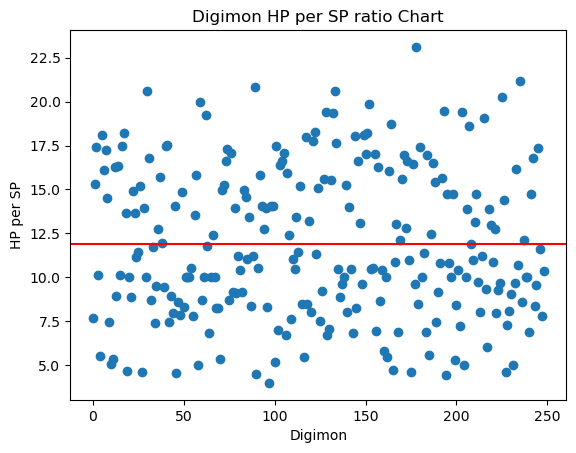

In [37]:
digimon['HP/SP']=round(digimon['Lv 50 HP']/digimon['Lv50 SP'],2)
x=[]
for i in range(len(digimon['HP/SP'])):
    x.append(i)
y=digimon['HP/SP']

plt.axhline(y=digimon['HP/SP'].mean(),color='r',linestyle='-',label="Mean")
plt.scatter(x,y)
plt.xlabel('Digimon')
plt.ylabel('HP per SP')
plt.title('Digimon HP per SP ratio Chart')

plt.show()

In [39]:
digimon.sort_values(by='HP/SP',ascending=False).head()

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd,HP/SP
178,179,Gankoomon,Mega,Data,Fire,22,1,2080,90,188,163,109,138,23.11
235,236,Belphemon RM,Ultra,Virus,Dark,25,0,1780,84,247,168,109,140,21.19
89,90,Tyrannomon,Champion,Data,Fire,6,2,1230,59,148,125,59,97,20.85
133,134,ShogunGekomon,Ultimate,Virus,Water,12,2,1980,96,113,113,99,97,20.62
30,31,Goblimon,Rookie,Virus,Earth,4,1,1050,51,115,110,51,84,20.59


In [41]:
digimon.sort_values(by='HP/SP',ascending=True).head()

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd,HP/SP
97,98,Bakemon,Champion,Virus,Dark,6,2,590,148,64,74,138,128,3.99
194,195,Dianamon,Mega,Data,Water,20,1,790,178,89,154,198,183,4.44
90,91,Gatomon,Champion,Vaccine,Light,8,1,640,143,69,79,143,123,4.48
46,47,Salamon,Rookie,Vaccine,Light,4,1,540,118,59,69,119,97,4.58
175,176,Ophanimon,Mega,Vaccine,Light,20,2,840,183,104,164,193,153,4.59


In [43]:
#NLP analysis reveal of Moves

In [45]:
movelist['Attack Type']='None'
movelist['Accuracy Rate']='100%'
movelist['Attack Count']='1'
tem_l=[]
for i in range(len(movelist['Description'])):
    if 'all foe' in movelist['Description'][i] or 'to all' in movelist['Description'][i]:
        movelist.loc[[i],['Attack Type']]='all foe'
    if 'one foe' in movelist['Description'][i]:
        movelist.loc[[i],['Attack Type']]='one foe'
    
    if 'accuracy' in movelist['Description'][i]:
        w=movelist['Description'][i]
        for j in range(len(w)):
            if 'a'==w[j] and 'c'==w[j+1] and 'c'==w[j+2]:
                l=w[j-5:j-1]
                moveslist.loc[[i],['Accuracy Rate']]=l
                
    if movelist['Description'][i][0].isnumeric():
        l=movelist['Description'][i].split()
        movelist.loc[[i],['Attack Count']]=l[0]
    if 'penetrating' in movelist['Description'][i]:
        tem_l.append(i)
        tem_l.append(movelist['Description'][i])

movelist=movelist.reindex(columns=['Move','SP Cost','Type','Power','Attack Type','Attack Count','Accuracy Rate','Inheritable','Best ratio','Description'])        

movelist.head()

NameError: name 'moveslist' is not defined